# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



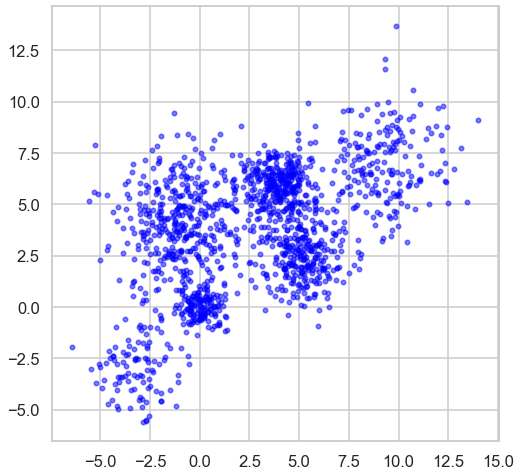

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

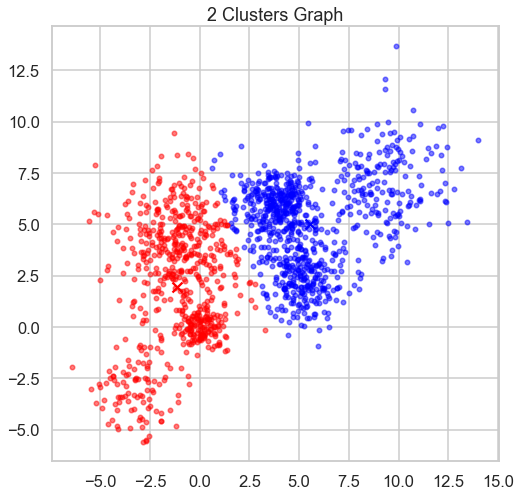

-16716.69763716087
score is 0.4751544541991239


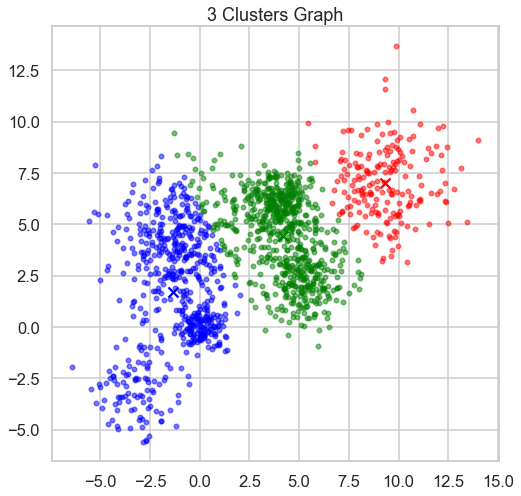

-12094.904429675611
score is 0.43631793714185435


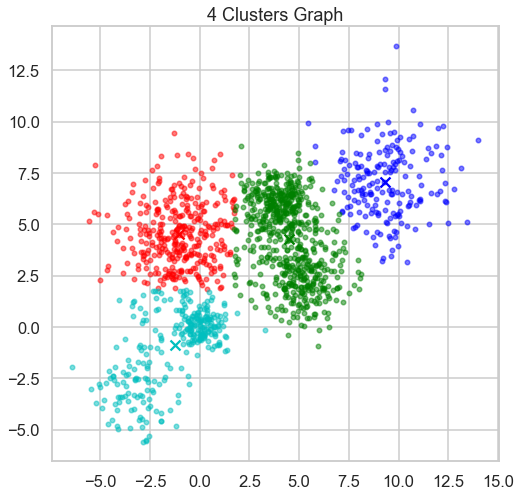

-7812.226623315885
score is 0.4628725400351352


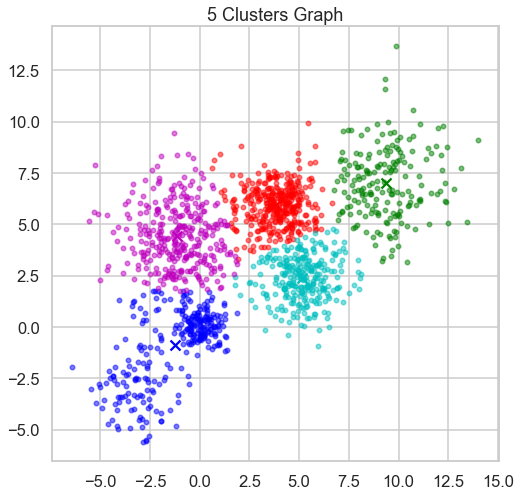

-5600.21751534245
score is 0.48100602217073096


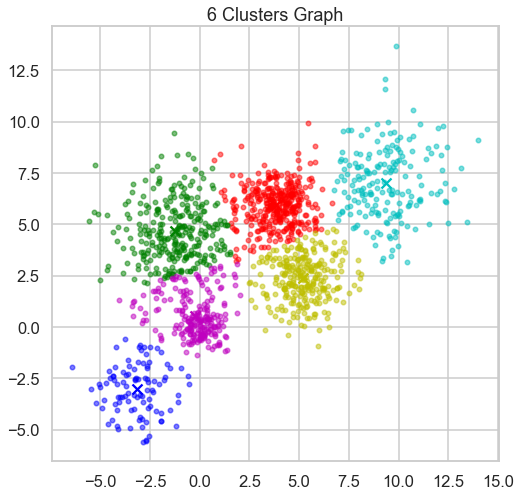

-4310.349104101395
score is 0.4860507215098807


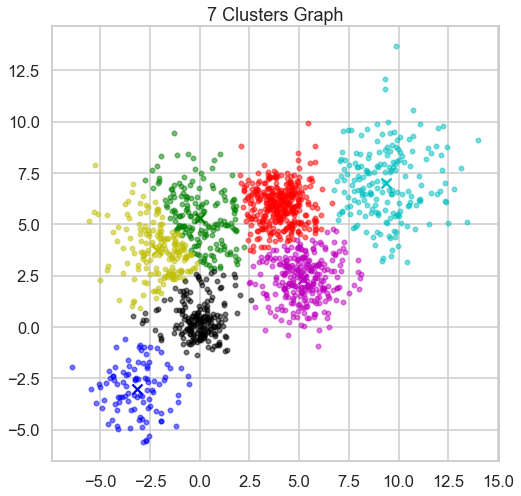

-3811.174338950757
score is 0.4635517212256283


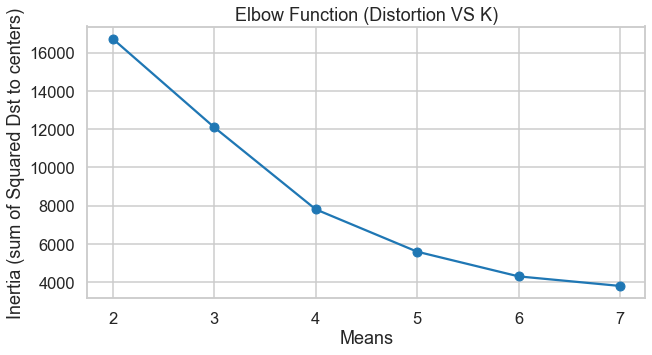

0.43631793714185435


In [5]:
Data=Multi_blob_Data
means=[]
inertias=[]
minSilScore=None
for counter in range(2,8):
    kmeans=KMeans(n_clusters=counter)
    kmeans.fit(Data)
    display_cluster(Data,kmeans,counter)
    plt.title(f"{counter} Clusters Graph")
    plt.show()
    means.append(counter)
    inertias.append(kmeans.inertia_)
    print(kmeans.score(Data))
    
    score=silhouette_score(Data,kmeans.labels_)
    print(f"score is {score}")
    if minSilScore==None or score<minSilScore  :
        minSilScore=score

fig=plt.subplots(figsize=(10,5))
plt.plot(means,inertias, 'o-')
plt.title("Elbow Function (Distortion VS K)")
plt.xlabel("Means")
plt.ylabel("Inertia (sum of Squared Dst to centers)")
plt.grid=True
plt.show()
print(minSilScore)



### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [6]:
from sklearn.cluster import AgglomerativeClustering

data2=Multi_blob_Data
euclClustered=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average').fit(data2)



### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

Estimated number of clusters: 3
Estimated number of noise points: 80
Homogeneity: 0.316
Completeness: 0.709
V-measure: 0.437
Adjusted Rand Index: 0.190
Adjusted Mutual Information: 0.434
Silhouette Coefficient: 0.250


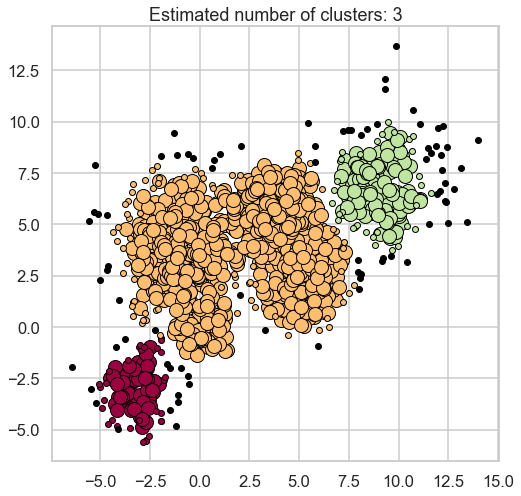

In [7]:
from sklearn import metrics

data2=Multi_blob_Data

# dbClustered=DBSCAN(eps=0.5,min_samples=5).fit(data2)
# print(dbClustered.labels_)
# display_cluster(Multi_blob_Data,dbClustered,3)

db = DBSCAN(eps=0.8, min_samples=10).fit(data2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(y, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data2, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data2[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data2[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

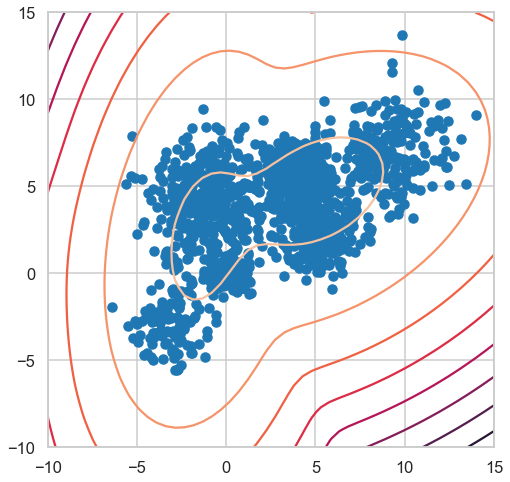

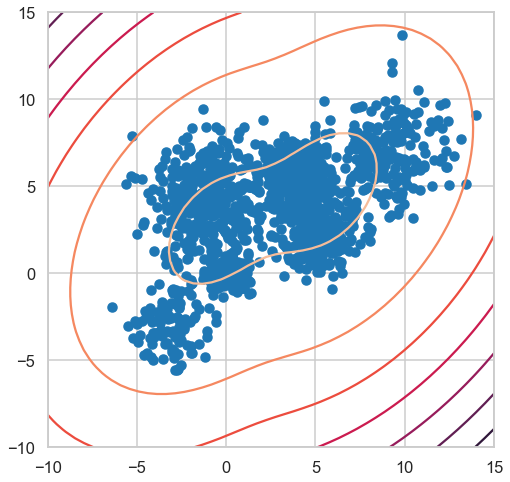

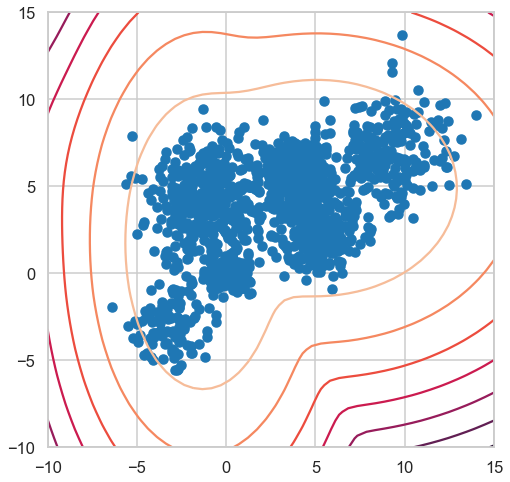

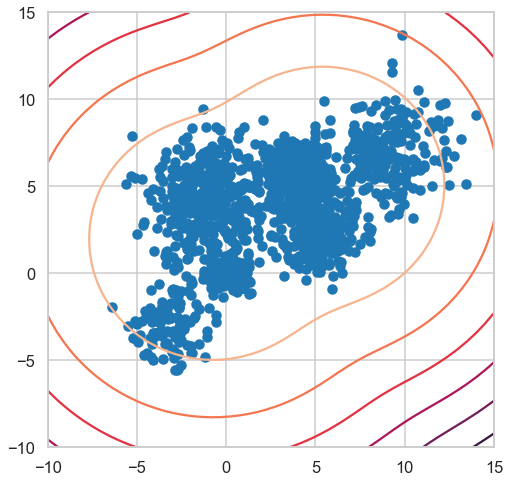

In [8]:
data2=Multi_blob_Data
gm = GaussianMixture(n_components=2).fit(data2)
X, Y = np.meshgrid(np.linspace(-10, 15), np.linspace(-10, 15))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(data2[:, 0], data2[:, 1])
plt.show()

gm2 = GaussianMixture(n_components=2, covariance_type="tied").fit(data2)
X, Y = np.meshgrid(np.linspace(-10, 15), np.linspace(-10, 15))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gm2.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(data2[:, 0], data2[:, 1])
plt.show()


gm3 = GaussianMixture(n_components=2, covariance_type="diag").fit(data2)
X, Y = np.meshgrid(np.linspace(-10, 15), np.linspace(-10, 15))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gm3.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(data2[:, 0], data2[:, 1])
plt.show()


gm4 = GaussianMixture(n_components=2, covariance_type="spherical").fit(data2)
X, Y = np.meshgrid(np.linspace(-10, 15), np.linspace(-10, 15))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gm4.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(data2[:, 0], data2[:, 1])
plt.show()



## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


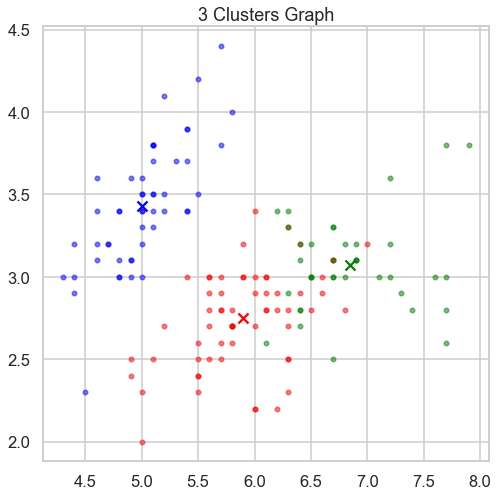

In [19]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
# print(iris_data['data'])
['setosa', 'versicolor', 'virginica']
kmeansIris=KMeans(n_clusters=3)
kmeansIris.fit(iris_data['data'])
display_cluster(iris_data['data'],kmeansIris,3)
plt.title(f"{3} Clusters Graph")
plt.show()





* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 